# tähän voi kirjoittaa tekstiä 

In [356]:
# !python -m pip install pandas
# !python -m pip list
import pandas as pd
dict = {
  "id": [1,2,3,4,5],
  "ika" : [20,34,76,58,44],
  "sukupuoli": ['N', 'M', 'M', 'N', 'M']
} 
df = pd.DataFrame(dict)
df



,id,ika,sukupuoli
0,1,20,N
1,2,34,M
2,3,76,M
3,4,58,N
4,5,44,M


In [357]:
df['pituus'] = [158,164,170,165,161]
df

,id,ika,sukupuoli,pituus
0,1,20,N,158
1,2,34,M,164
2,3,76,M,170
3,4,58,N,165
4,5,44,M,161


In [358]:
df2 = pd.DataFrame({
    'kengannumero': [40,45,42,41,39],
    'paino': [60,80,75,69,12]
})

df2

,kengannumero,paino
0,40,60
1,45,80
2,42,75
3,41,69
4,39,12


In [359]:
# yhdistä kaksi datataulukkoa
# axis=1 sarake
# axis=0 rivi

df3 = pd.concat([df,df2], axis=1)
df3

,id,ika,sukupuoli,pituus,kengannumero,paino
0,1,20,N,158,40,60
1,2,34,M,164,45,80
2,3,76,M,170,42,75
3,4,58,N,165,41,69
4,5,44,M,161,39,12


In [360]:
# lisää uusi rivi 
# .loc[]
# löytää arvot indeksin mukaan

#korvaa olemassaolevan rivin indeksin perusteella
df3.loc[1] = [2, 32, "N", 173, 38, 70]
#print(df3)

#lisää rivin loppuun
df3.loc[len(df3.index)] = [6, 15, "N", 180, 39, 68]
df3

,id,ika,sukupuoli,pituus,kengannumero,paino
0,1,20,N,158,40,60
1,2,32,N,173,38,70
2,3,76,M,170,42,75
3,4,58,N,165,41,69
4,5,44,M,161,39,12
5,6,15,N,180,39,68


In [361]:
df_series = pd.Series([7, 64, "M", 175, 43, 75], index=df3.columns)
df_series

id                7
ika              64
sukupuoli         M
pituus          175
kengannumero     43
paino            75
dtype: object

In [362]:
# liitetään yllä luotu sarake tietoviitekehykseen muuttamalla se ensin DataFrameksi
apu_df = pd.DataFrame([df_series])
df4 = pd.concat([df3, apu_df], axis=0, ignore_index=True) # muuten aloittaa indeksoinnin alusta
df4

,id,ika,sukupuoli,pituus,kengannumero,paino
0,1,20,N,158,40,60
1,2,32,N,173,38,70
2,3,76,M,170,42,75
3,4,58,N,165,41,69
4,5,44,M,161,39,12
5,6,15,N,180,39,68
6,7,64,M,175,43,75


In [363]:
dict3 = {
    "id" : [1,2,4],
    "syntymavuosi": [2002,1988,'kenkä']
}

df5 = pd.DataFrame(dict3)
df5

,id,syntymavuosi
0,1,2002
1,2,1988
2,4,kenkä


In [364]:
# lisätään tiedot olemassa olevaan tietokehykseen
# viittausarvona on id
# lisätään vasemmalle

df6 = df4.merge(df5, on="id", how='left') # left-viittaa ensimmäiseen taulukkoon vrt. tietokantakieli -> ottaa kaikki ensimmäisestä talulusta

df6

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,20,N,158,40,60,2002
1,2,32,N,173,38,70,1988
2,3,76,M,170,42,75,NaN
3,4,58,N,165,41,69,kenkä
4,5,44,M,161,39,12,NaN
5,6,15,N,180,39,68,NaN
6,7,64,M,175,43,75,NaN


In [365]:
#rivit ja sarakkeet
df6.shape


(7, 7)

In [366]:
df6.dtypes

id               int64
ika              int64
sukupuoli       object
pituus           int64
kengannumero     int64
paino            int64
syntymavuosi    object
dtype: object

In [367]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            7 non-null      int64 
 1   ika           7 non-null      int64 
 2   sukupuoli     7 non-null      object
 3   pituus        7 non-null      int64 
 4   kengannumero  7 non-null      int64 
 5   paino         7 non-null      int64 
 6   syntymavuosi  3 non-null      object
dtypes: int64(5), object(2)
memory usage: 520.0+ bytes


In [368]:
# palauttaa numeerisista arvoista määrän, keskiarvon, keskihajauman, minimin ja maksimin
# arvot, jotka kuuluvat 25%, 50% ja 75%

df6.describe()

,id,ika,pituus,kengannumero,paino
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,44.142857,168.857143,40.285714,61.285714
std,2.160247,23.024831,7.904188,1.799471,22.313780
min,1.000000,15.000000,158.000000,38.000000,12.000000
25%,2.500000,26.000000,163.000000,39.000000,64.000000
50%,4.000000,44.000000,170.000000,40.000000,69.000000
75%,5.500000,61.000000,174.000000,41.500000,72.500000
max,7.000000,76.000000,180.000000,43.000000,75.000000


In [369]:
# oletus 5 ensimmäistä
# tässä 3
# df.tail() > 5 viimeistä
#df.sample()

df6.head(3) 

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,20,N,158,40,60,2002
1,2,32,N,173,38,70,1988
2,3,76,M,170,42,75,NaN


In [370]:
# tarkistetaan mitä arvoja on sukupuolessa

df6['sukupuoli'].unique()

array(['N', 'M'], dtype=object)

In [371]:
# Ensimmäinen kerta palauttaa arvon False, jos arvo toistuu palautetaan True

print(df6['ika'].duplicated().to_string())

0    False
1    False
2    False
3    False
4    False
5    False
6    False


In [372]:
# hae jos ikä 40 tai yli
# ja luodaan uusi dataframe
df7 = df6[df6['ika']>=40]
df7

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
2,3,76,M,170,42,75,NaN
3,4,58,N,165,41,69,kenkä
4,5,44,M,161,39,12,NaN
6,7,64,M,175,43,75,NaN


In [373]:
df7a = df6[(df6['ika'] >= 40) & (df6['pituus'] >= 170)]
df7a

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
2,3,76,M,170,42,75,NaN
6,7,64,M,175,43,75,NaN


In [374]:
# lisää kaikille 1 vuosi ikään

df6['ika'] = df6['ika'] + 1
df6

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,21,N,158,40,60,2002
1,2,33,N,173,38,70,1988
2,3,77,M,170,42,75,NaN
3,4,59,N,165,41,69,kenkä
4,5,45,M,161,39,12,NaN
5,6,16,N,180,39,68,NaN
6,7,65,M,175,43,75,NaN


In [375]:
# jos mies lisää painoa 2 kg

df6.loc[(df6['sukupuoli']=='M'), 'paino'] = df6.loc[(df6['sukupuoli']=='M'),'paino'] + 2
df6

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,21,N,158,40,60,2002
1,2,33,N,173,38,70,1988
2,3,77,M,170,42,77,NaN
3,4,59,N,165,41,69,kenkä
4,5,45,M,161,39,14,NaN
5,6,16,N,180,39,68,NaN
6,7,65,M,175,43,77,NaN


In [376]:
# poista muuttuja ikä ja sukupuoli

df8 = df6.drop(['ika', 'sukupuoli'],axis=1)
df8

,id,pituus,kengannumero,paino,syntymavuosi
0,1,158,40,60,2002
1,2,173,38,70,1988
2,3,170,42,77,NaN
3,4,165,41,69,kenkä
4,5,161,39,14,NaN
5,6,180,39,68,NaN
6,7,175,43,77,NaN


In [377]:
# poistetaan 1 rivi id:n perusteella

indeksi = df6[df6['id']==6].index # haetaan indeksi
df10 = df6.drop(indeksi)
df10

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,21,N,158,40,60,2002
1,2,33,N,173,38,70,1988
2,3,77,M,170,42,77,NaN
3,4,59,N,165,41,69,kenkä
4,5,45,M,161,39,14,NaN
6,7,65,M,175,43,77,NaN


In [378]:
# poista rivit, jos NaN-arvot

df11 = df10.dropna()
df11

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,21,N,158,40,60,2002
1,2,33,N,173,38,70,1988
3,4,59,N,165,41,69,kenkä


In [379]:
#täytetään tyhjät jollain tiedolla
df12 = df10.fillna('?')
df12

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,21,N,158,40,60,2002
1,2,33,N,173,38,70,1988
2,3,77,M,170,42,77,?
3,4,59,N,165,41,69,kenkä
4,5,45,M,161,39,14,?
6,7,65,M,175,43,77,?


In [380]:
# syntymävuotta ei voi kopioda, tässä esimerkin omaisesti
# täyttää vierekkäsillä arvoilla
df13 = df10.ffill()
df13

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,21,N,158,40,60,2002
1,2,33,N,173,38,70,1988
2,3,77,M,170,42,77,1988
3,4,59,N,165,41,69,kenkä
4,5,45,M,161,39,14,kenkä
6,7,65,M,175,43,77,kenkä


In [381]:
# täytetään tyhjät kohdat laskemalla arvot
# huom tietotyyppi muuttuu
df10['syntymavuosi'] = 2025 - df10['ika']
df10 

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,21,N,158,40,60,2004
1,2,33,N,173,38,70,1992
2,3,77,M,170,42,77,1948
3,4,59,N,165,41,69,1966
4,5,45,M,161,39,14,1980
6,7,65,M,175,43,77,1960


In [382]:
# järjestä sarakkeet

df10['ika'].sort_values(ascending=False)

2    77
6    65
3    59
4    45
1    33
0    21
Name: ika, dtype: int64

In [383]:
df10.sort_values(['sukupuoli', 'ika'], ascending=[False,True], ignore_index=True, inplace=True)

In [384]:
import matplotlib.pyplot as plt
import numpy as np


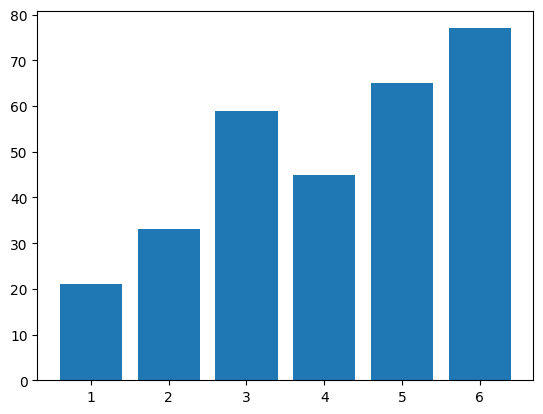

In [385]:
x = np.arange(1,7)
y = np.array(df10['ika'])
plt.bar(x,y)  #plot, bar, scatter
plt.show()

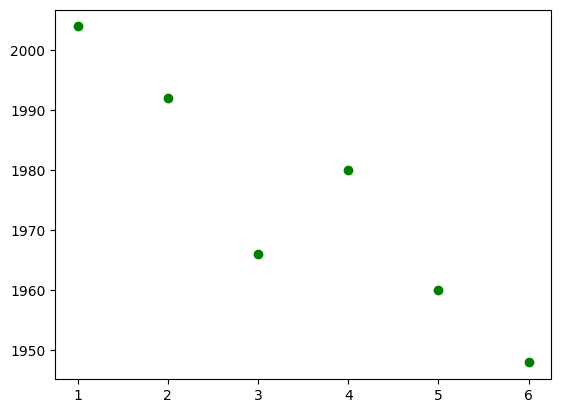

In [386]:
x = np.arange(1,7)
y = np.array(df10['syntymavuosi'])
plt.plot(x,y, 'go')  # 'g^', 
plt.show()

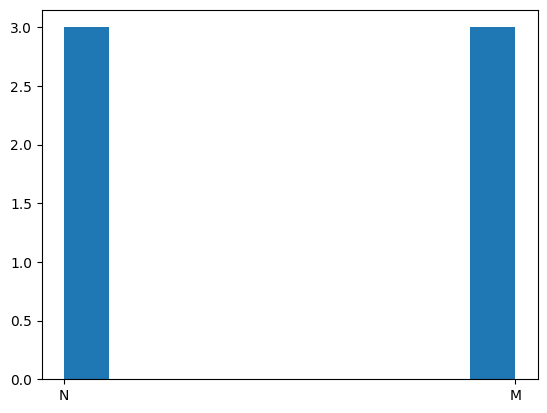

In [387]:
# histogrammilla voi kuvata normaalijakaumaa. Tässä esimerkissä sitä ei ole
plt.hist(df10["sukupuoli"])
plt.show() 

In [388]:
naiset = df10[df10['sukupuoli'] == 'N']['id'].count()
miehet = df10[df10['sukupuoli'] == 'M']['id'].count()

sukupuolet = [naiset, miehet]
sukupuolet

[np.int64(3), np.int64(3)]

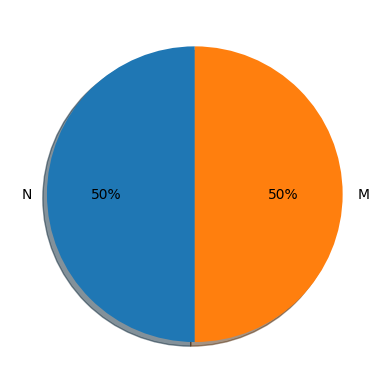

In [389]:
y = np.array(sukupuolet)
labels = ['N', 'M']

plt.pie(y, labels=labels, autopct='%1.d%%', shadow=True, startangle=90)
plt.show()

In [390]:
print(df10)


   id  ika sukupuoli  pituus  kengannumero  paino  syntymavuosi
0   1   21         N     158            40     60          2004
1   2   33         N     173            38     70          1992
2   4   59         N     165            41     69          1966
3   5   45         M     161            39     14          1980
4   7   65         M     175            43     77          1960
5   3   77         M     170            42     77          1948


In [391]:
# tallenna muokattu data json-tiedostoksi

df10.to_json('ekatehtava.json')

In [392]:
# tallenna muokattu data json,-tiedostoksi
df10.to_csv('ekatehtava.csv', index=False)

In [393]:
# tuo data pandasilla

tuotu_data = pd.read_csv('ekatehtava.csv',  encoding='utf-8', sep=',')
#tuotu_data = tuotu_data.drop('Unnamed: 0', axis=1)
tuotu_data

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,21,N,158,40,60,2004
1,2,33,N,173,38,70,1992
2,4,59,N,165,41,69,1966
3,5,45,M,161,39,14,1980
4,7,65,M,175,43,77,1960
5,3,77,M,170,42,77,1948


In [394]:
x = pd.read_json('ekatehtava.json')
x

,id,ika,sukupuoli,pituus,kengannumero,paino,syntymavuosi
0,1,21,N,158,40,60,2004
1,2,33,N,173,38,70,1992
2,4,59,N,165,41,69,1966
3,5,45,M,161,39,14,1980
4,7,65,M,175,43,77,1960
5,3,77,M,170,42,77,1948
